<a href="https://colab.research.google.com/github/saikiran-0110/Quantum-Stock-Market-Predictor/blob/main/DJ_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 8.1 MB/s eta 0:00:00


In [ ]:
!pip install -U qiskit yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.52
    Uninstalling yfinance-0.2.52:
      Successfully uninstalled yfinance-0.2.52


In [ ]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 34.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import datetime
import matplotlib.pyplot as plt
import yfinance as yf
from qiskit import QuantumCircuit, transpile
from qiskit.primitives import Sampler
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [ ]:
def fetch_stock_data(ticker, period="6d"):
    print(f"📥 Fetching stock data for {ticker}...")
    data = yf.download(ticker, period=period, interval="1d")

    if data.empty:
        print(f"❌ Error: No data fetched for {ticker}! Market might be closed.")
        return None

    print(f"✅ Data fetched successfully for {ticker}!")
    return data

# Step 2: Calculate trend movements
def extract_trend_data(data):
    if data is None:
        return None

    trend_data = data["Close"].diff().dropna().values  # Calculates daily price changes
    print("🔍 Extracted Trend Data:", trend_data)

    if len(trend_data) == 0:
        print("❌ Error: Trend data is empty! Cannot proceed with quantum processing.")
        return None

    return trend_data

# Step 3: Quantum circuit for trend classification using Deutsch-Jozsa
def deutsch_jozsa_circuit(trend_data):
    num_qubits = int(np.ceil(np.log2(len(trend_data))))  # Ensure enough qubits
    qc = QuantumCircuit(num_qubits + 1, num_qubits)

    # Apply Hadamard gates to input qubits
    qc.h(range(num_qubits + 1))

    # Apply Oracle (simulated as a phase flip for now)
    for i, trend in enumerate(trend_data):
        if trend > 0:  # Simulating market uptrend encoding
            qc.z(i % num_qubits)

    # Apply Hadamard gates again
    qc.h(range(num_qubits))

    # Measure qubits
    qc.measure(range(num_qubits), range(num_qubits))

    return qc

# Step 4: Run the quantum algorithm
def run_quantum_circuit(qc):
    simulator = AerSimulator()
    result = simulator.run(qc, shots=1024).result()
    counts = result.get_counts()
    return counts

# *Main Execution*
ticker = "NVDA"
stock_data = fetch_stock_data(ticker)

trend_data = extract_trend_data(stock_data)
if trend_data is not None:
    quantum_circuit = deutsch_jozsa_circuit(trend_data)
    counts = run_quantum_circuit(quantum_circuit)

    print("📊 Quantum Result:", counts)
    plot_histogram(counts)



📥 Fetching stock data for NVDA...


[*********************100%***********************]  1 of 1 completed

✅ Data fetched successfully for NVDA!
🔍 Extracted Trend Data: [[ 3.73001099]
 [-0.77000427]
 [-1.66000366]
 [ 4.1499939 ]
 [ 3.56001282]]
📊 Quantum Result: {'010': 1024}


In [ ]:
binary_result = list(counts.keys())[0]  # Get the most frequent quantum output
trend_score = sum([int(bit) for bit in binary_result])  # Count number of '1's

total_bits = len(binary_result)  # Total number of qubits in output
threshold = total_bits // 2  # Midpoint to determine trend

if trend_score > threshold:
    print("📊 *Market Trend: BULLISH (Uptrend) 📈* → Buy Signal!")
elif trend_score < threshold:
    print("📊 *Market Trend: BEARISH (Downtrend) 📉* → Sell Signal!")
else:
    print("📊 *Market Trend: NEUTRAL (Stable) 😐* → Hold Position!")

📊 *Market Trend: NEUTRAL (Stable) 😐* → Hold Position!


In [ ]:
import yfinance as yf

# Define the stock ticker
ticker = "NVDA"

# Fetch stock data for the last 1 month
data = yf.download(ticker, period="6d", interval="1d")

# Display the last few rows
print(data.tail())

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            NVDA        NVDA        NVDA        NVDA       NVDA
Date                                                                 
2025-02-10  133.570007  135.000000  129.960007  130.089996  216989100
2025-02-11  132.800003  134.479996  131.020004  132.580002  178902400
2025-02-12  131.139999  132.240005  129.080002  130.020004  160278600
2025-02-13  135.289993  136.500000  131.169998  131.559998  197430000
2025-02-14  138.850006  139.250000  135.500000  136.479996  194892300


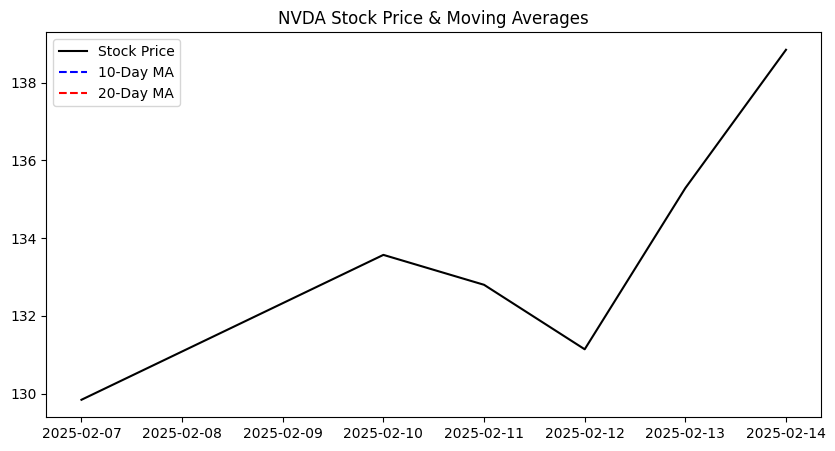

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate 10-day and 20-day Moving Averages
data["MA10"] = data["Close"].rolling(window=10).mean()
data["MA20"] = data["Close"].rolling(window=20).mean()

# Plot stock price with moving averages
plt.figure(figsize=(10, 5))
plt.plot(data["Close"], label="Stock Price", color="black")
plt.plot(data["MA10"], label="10-Day MA", color="blue", linestyle="dashed")
plt.plot(data["MA20"], label="20-Day MA", color="red", linestyle="dashed")
plt.legend()
plt.title(f"{ticker} Stock Price & Moving Averages")
plt.show()

In [ ]:
import numpy as np

if data.empty:
    print(f"❌ Error: No data fetched for {ticker}. Market might be closed.")
else:
    print(f"✅ Data fetched successfully for {ticker}.")

    # Calculate RSI
    window_length = 14  # Standard RSI period
    delta = data["Close"].diff()

    gain = (delta.where(delta > 0, 0)).rolling(window=window_length).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window_length).mean()

    rs = gain / loss
    data["RSI"] = 100 - (100 / (1 + rs))

    # Drop NaN values (first 14 entries will be NaN)
    data = data.dropna()

    # Classify RSI signal
    data["Signal"] = data["RSI"].apply(lambda x: "🔴 Sell" if x > 70 else ("🟢 Buy" if x < 30 else "⚪ Neutral"))

    # Display RSI and Signal
    print(data[["Close", "RSI", "Signal"]].tail())

✅ Data fetched successfully for NVDA.
Price            Close        RSI     Signal
Ticker            NVDA                      
Date                                        
2025-02-12  131.139999  38.977245  ⚪ Neutral
2025-02-13  135.289993  44.944130  ⚪ Neutral
2025-02-14  138.850006  69.701054  ⚪ Neutral


<ipython-input-128-e3c054fd42f6>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Signal"] = data["RSI"].apply(lambda x: "🔴 Sell" if x > 70 else ("🟢 Buy" if x < 30 else "⚪ Neutral"))


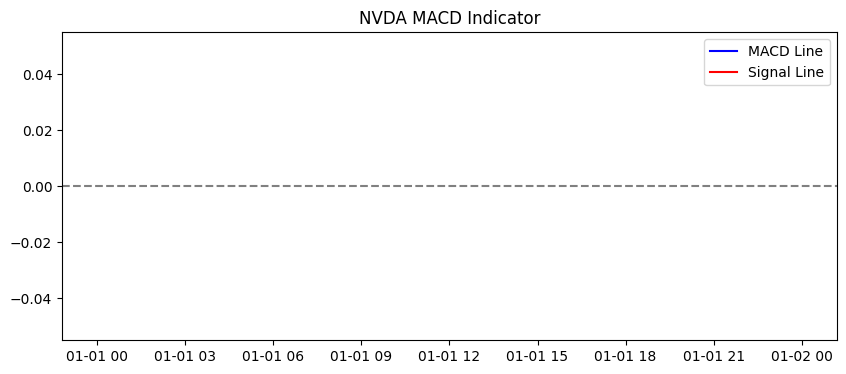

In [ ]:
# Calculate MACD Line and Signal Line
short_ema = data["Close"].ewm(span=12, adjust=False).mean()
long_ema = data["Close"].ewm(span=26, adjust=False).mean()
data["MACD"] = short_ema - long_ema
data["Signal"] = data["MACD"].ewm(span=9, adjust=False).mean()

# Plot MACD
plt.figure(figsize=(10, 4))
plt.plot(data["MACD"], label="MACD Line", color="blue")
plt.plot(data["Signal"], label="Signal Line", color="red")
plt.axhline(0, linestyle="dashed", color="gray")
plt.title(f"{ticker} MACD Indicator")
plt.legend()
plt.show()